### Convolution Neural Network (CNN)

In [1]:
#Dataset link:
#https://drive.google.com/drive/folders/1ESsfpI6sYTtHoUv8ihI0AJSOVgij6xfq?usp=sharing

In [1]:
# Importing the libraries for the layers of CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [2]:
# Importing the library for image handling/preprocessing
from tensorflow.keras.preprocessing import image

In [3]:
# Image Augumentation
# create few more images by stretching, zooming, shrinking, rotating, flipping the available images
#This will make the model to learn very generically about the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.,
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect')

In [4]:
test_datagen=ImageDataGenerator(rescale=1/255.) # We dont experiment the test data generally
# only scaling is enough for test data

In [5]:
# Laod the images from the train and test folders by resizing it for 128x128
#Image augumentaion defined above will be performed for each batch of images 
# class mode is "categorical" for multiclass problem ("binary" for binomial problem) 
training_set=train_datagen.flow_from_directory('C:/Users/Senthil/Desktop/DEEP_LEARNING/flower_photos/Training',
                                              target_size=(128,128),
                                              batch_size=128,
                                              class_mode='categorical')

# Total of 2736 images corresponds to 5 differnt classses are loaded in to this notebook 
                                                   #from the training folder (harddrive)

Found 2736 images belonging to 5 classes.


In [6]:
test_set=test_datagen.flow_from_directory('C:/Users/Senthil/Desktop/DEEP_LEARNING/flower_photos/Testing',
                                              target_size=(128,128),
                                              batch_size=128,
                                              class_mode='categorical')

# Total of 934 images corresponds to 5 differnt classses are loaded in to this notebook 
                                                   #from the testing folder (harddrive)

Found 934 images belonging to 5 classes.


In [7]:
classifier = Sequential() # Sequentialy we are going to add the layers in this network

#Define the convolution layer with 16 kernals each of size 3x3
# This layer will accept the images of size 128x128x3
# Activation function for this layer is ReLU
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

#Maxpool layer generally defined at the end of each convolution layer. 
#Poolsize of 2x2 will bring down the feature map(convolution layer output) size by half
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Define the second convolution and maxpool layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Third Convolution and Maxpool Layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the feature map produced by the last convolution layer as single vector
classifier.add(Flatten())

#Add the hidden layers
classifier.add(Dense(units = 128,activation = 'relu'))

# Output layer should have 5 neurons as this data is having 5 classes of flowers
#"Softmax" activation function is preferred for Multiclass problem 
classifier.add(Dense(units = 5, activation = 'softmax'))

In [8]:
#compile the CNN model with 'adam' optimizer to minimize the loss (cross entropy)
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
# Fit(Train) the model using trainset of data
# How many time the weight needs to be updated in one iteratin will be decided by steps_per_epoch
# How many iteration for which the training need to be happen will be decided by 'epochs'
classifier.fit_generator(training_set,
                         steps_per_epoch =2736//128,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 934//128)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 7 steps
Epoch 1/3
21/21 [==============================] - 32s 2s/step - loss: 1.5077 - accuracy: 0.3117 - val_loss: 1.2939 - val_accuracy: 0.4509
Epoch 2/3
21/21 [==============================] - 31s 1s/step - loss: 1.2124 - accuracy: 0.4935 - val_loss: 1.1859 - val_accuracy: 0.5067
Epoch 3/3
21/21 [==============================] - 33s 2s/step - loss: 1.1079 - accuracy: 0.5525 - val_loss: 1.2010 - val_accuracy: 0.5435


In [22]:
#Libraries for loading image and visualising the output of each layer
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from visualize_layer import visualize_layer
import warnings
warnings.filterwarnings('ignore')

(1, 126, 126, 16)
(1, 63, 63, 16)
(1, 61, 61, 32)
(1, 30, 30, 32)
(1, 28, 28, 64)
(1, 14, 14, 64)
(1, 12544)
(1, 128)
(1, 5)


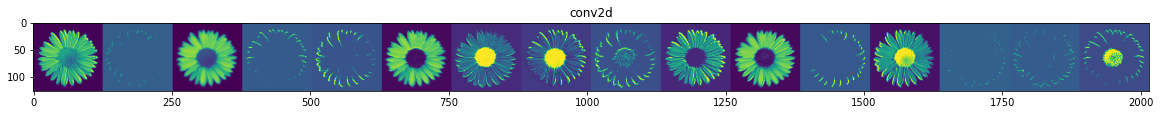

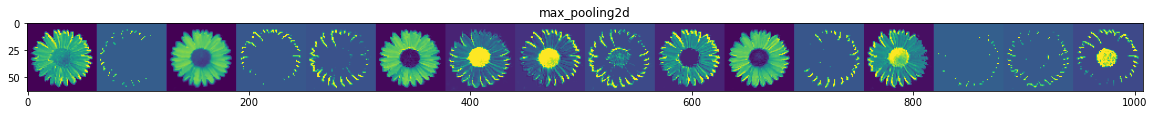

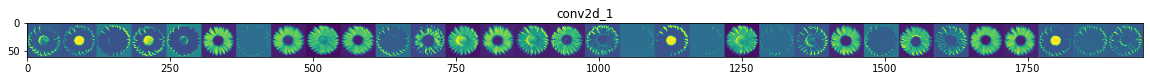

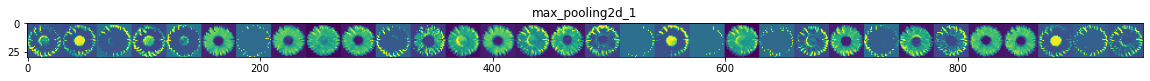

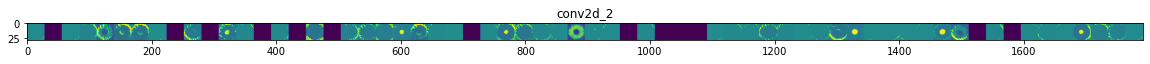

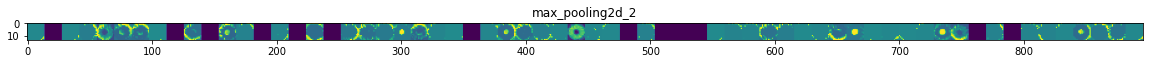

In [17]:
img_path='C:\\Users\\Senthil\\Desktop\\DEEP_LEARNING\\flower_photos\\Training\\daisy\\21652746_cc379e0eea_m.jpg'
visualize_layer(img_path,classifier) # Function to visualize the output of each layer

In [12]:
# The first layer of CNN (i.e first convolution layer)
classifier.layers[0]

In [13]:
# output of the first layer
classifier.layers[0].output

<tf.Tensor 'conv2d/Identity:0' shape=(None, 126, 126, 16) dtype=float32>

In [14]:
#input of the CNN model
classifier.input

<tf.Tensor 'conv2d_input:0' shape=(None, 128, 128, 3) dtype=float32>

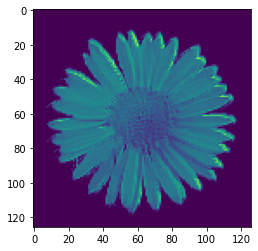

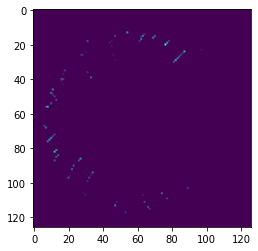

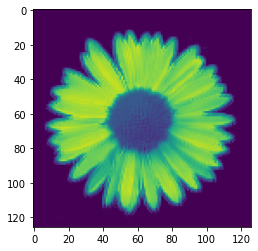

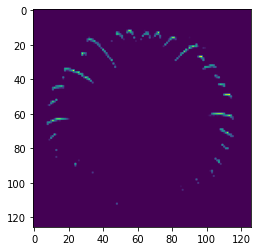

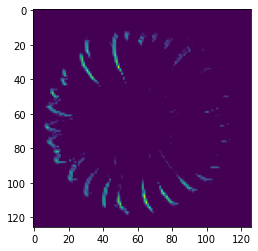

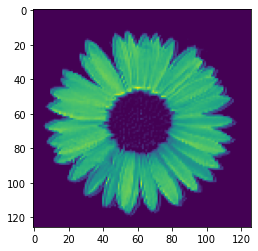

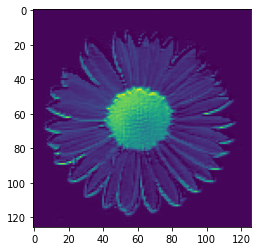

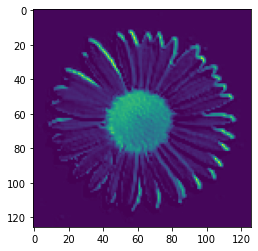

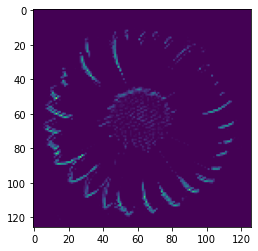

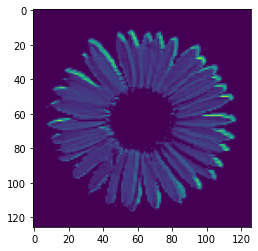

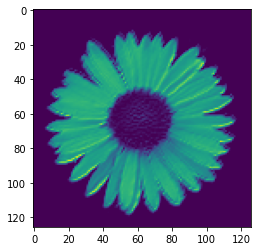

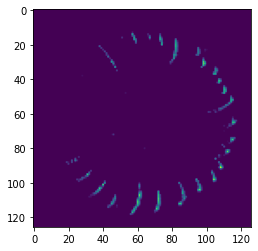

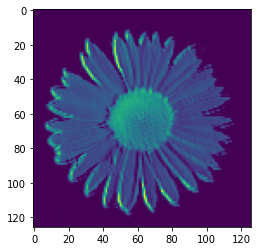

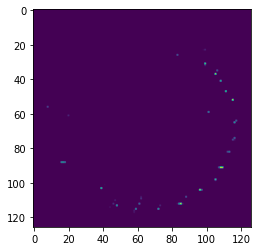

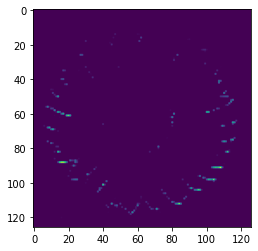

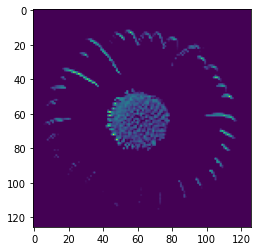

In [15]:
#Visuale the first layer output only (16 feature maps)
viz_model = tf.keras.models.Model(inputs = classifier.input, outputs = classifier.layers[0].output)
img = load_img(img_path, target_size=(128, 128))
x  = img_to_array(img)  
x=np.expand_dims(x,0)
x /= 255.0
feature_maps = viz_model.predict(x)
for i in range(0,feature_maps.shape[-1]):
    plt.imshow(feature_maps[:,:,:,i][0])
    plt.show()

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0